In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [84]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.declarative import declarative_base
Base = automap_base()

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")



In [44]:
# reflect an existing database into a new model
Base.prepare(engine, reflect = True)
Base.classes.keys()
# reflect the tables


In [43]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(engine)


# Exploratory Precipitation Analysis

In [74]:
# Find the most recent date in the data set.

result = session.query(measurement.date).all()
result_df = pd.DataFrame(result)
print(result_df.max())


0    2017-08-23
dtype: object


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


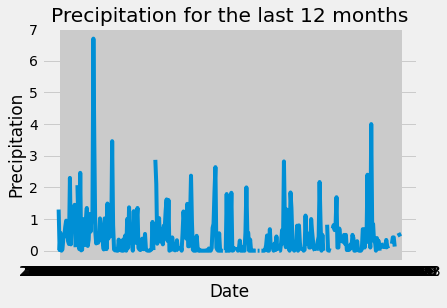

In [152]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column

# Code used once to inspect the data and understand what columns exist to inform queries
# inspector = inspect(engine)
# inspector.get_table_names()
# columns = inspector.get_columns('measurement')
# for c in columns:
#     print(c['name'], c["type"])
result = session.query(measurement.date, measurement.prcp).all()
prcp_df = pd.DataFrame(result)
last_year_df = prcp_df.tail(365)


# Sort the dataframe by date
new_column_list = ['Date', 'Precipitation']
last_year_df= last_year_df.set_axis(new_column_list, axis=1)
# last_year_df = last_year_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
# last_year_df.set_index('Date')['Precipitation'].plot()
fig, ax = plt.subplots()
plt.plot(last_year_df['Date'], last_year_df['Precipitation'])
ypos = range(1, len(last_year_df)+1)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_xticks(ypos)
ax.set_title("Precipitation for the last 12 months")
plt.show()


In [145]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = last_year_df['Precipitation'].mean()
median = last_year_df['Precipitation'].median()
maximum = last_year_df['Precipitation'].max()
minimum = last_year_df['Precipitation'].min()
stdev = last_year_df['Precipitation'].std()

stats = pd.DataFrame({'Mean Precipitation':mean, 
                            'Median Precipitation':median, 
                            'Max Precipitation':maximum, 
                            'Min Precipitation':minimum,
                            'Standard Deviation ': stdev}, index = ['Stats'])
stats

,Mean Precipitation,Median Precipitation,Max Precipitation,Min Precipitation,Standard Deviation
Stats,0.460494,0.215,6.7,0.0,0.713201


# Exploratory Station Analysis

In [226]:
# Design a query to calculate the total number stations in the dataset

# Code used once to inspect the data and understand what columns exist to inform queries
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
station_count = session.query(station.id).count()

print(station_count)



id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
9
[('WAIKIKI 717.2, HI US',), ('KANEOHE 838.1, HI US',), ('KUALOA RANCH HEADQUARTERS 886.9, HI US',), ('PEARL CITY, HI US',), ('UPPER WAHIAWA 874.3, HI US',), ('WAIMANALO EXPERIMENTAL FARM, HI US',), ('WAIHEE 837.5, HI US',), ('HONOLULU OBSERVATORY 702.2, HI US',), ('MANOA LYON ARBO 785.2, HI US',)]


In [200]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [measurement.station, measurement.date, measurement.prcp, measurement.tobs, station.name]
stations = session.query(*sel).filter(measurement.station == station.station).all()
stations
activity = session.query(*sel, func.count(measurement.prcp)).group_by(measurement.station).all()
activity_df = pd.DataFrame(activity)
activity_df.sort_values([0], ascending=[False])

/Users/meggiepf/opt/anaconda3/lib/python3.8/site-packages/sqlalchemy/sql/compiler.py:362: SAWarning: SELECT statement has a cartesian product between FROM element(s) "station" and FROM element "measurement".  Apply join condition(s) between each element to resolve.
  util.warn(message)


,0,1,2,3,4,5
8,USC00519523,2010-01-01,0.15,75.0,"WAIKIKI 717.2, HI US",23148
7,USC00519397,2010-01-01,0.08,65.0,"WAIKIKI 717.2, HI US",24165
6,USC00519281,2010-01-01,0.15,70.0,"WAIKIKI 717.2, HI US",24948
5,USC00518838,2010-01-01,0.21,72.0,"WAIKIKI 717.2, HI US",3078
4,USC00517948,2010-05-03,NaN,75.0,"WAIKIKI 717.2, HI US",6147
3,USC00516128,2010-01-01,0.14,73.0,"WAIKIKI 717.2, HI US",22356
2,USC00514830,2010-03-01,0.01,67.0,"WAIKIKI 717.2, HI US",17433
1,USC00513117,2010-01-01,0.28,67.0,"WAIKIKI 717.2, HI US",24264
0,USC00511918,2010-01-01,0.05,66.0,"WAIKIKI 717.2, HI US",17388


In [217]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(*sel).filter(measurement.station == "USC00516128").all()
most_active_df = pd.DataFrame(most_active)

new_column_list = ['Station ID', 'Measurement Date', 'Precipitation', 'Temperature', 'Station Name']
most_active_df= most_active_df.set_axis(new_column_list, axis=1)
print(f"The lowest temp is {most_active_df['Temperature'].min()}")
print(f" The highest temp is {most_active_df['Temperature'].max()}")
print(f"The average temp is {most_active_df['Temperature'].mean()}")



The lowest temp is 58.0
 The highest temp is 84.0
The average temp is 70.91500765696784


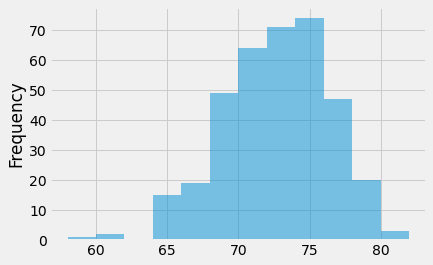

In [219]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_twelve = most_active_df['Temperature'].tail(365)


ax = last_twelve.plot.hist(bins=12, alpha=0.5)




# Close session

In [ ]:
# Close Session
session.close()